In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [4]:
df_train=pd.read_csv('file:///C://Users/Lenovo/Desktop/Data/SalaryData_Train.csv')
df_test=pd.read_csv('file:///C://Users/Lenovo/Desktop/Data/SalaryData_Test.csv')

In [5]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
str_cols = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [9]:
le = LabelEncoder()

for i in str_cols:
    df_train[i]=le.fit_transform(df_train[i])
    df_test[i]=le.fit_transform(df_test[i])

In [10]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [11]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [12]:
mapping = {' >50K': 1, ' <=50K': 2}

In [13]:
df_train = df_train.replace({'Salary': mapping})
df_test = df_test.replace({'Salary': mapping})

In [14]:
df = df_train.append(df_test)

In [15]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2


***EDA***

In [16]:
df.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,2.204507,10.313217,10.118463,2.585148,5.969572,1.412684,3.680281,0.675062,1101.454700,88.548617,40.938038,35.431503,1.752151
std,13.217981,0.958132,3.816992,2.552909,1.500460,4.026444,1.597242,0.832361,0.468357,7506.511295,404.838249,12.007640,5.931380,0.431769
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,2.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,2.000000
75%,47.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,2.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,2.000000


In [46]:
df.shape

(45221, 14)

In [18]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [19]:
corr = df.corr()

<AxesSubplot:>

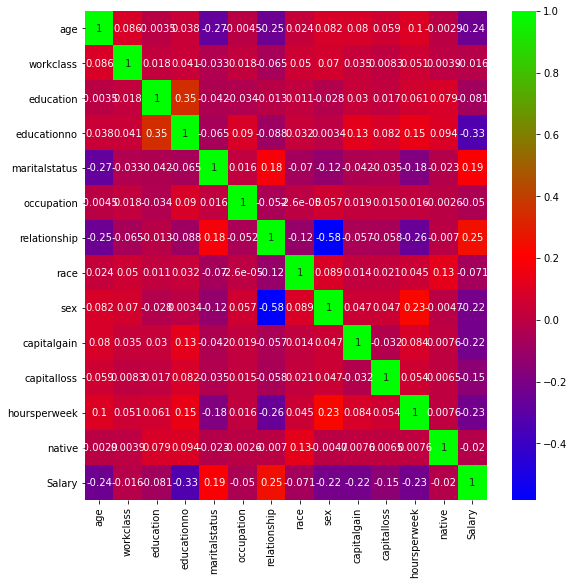

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(corr, annot=True, xticklabels=True, yticklabels=True, cmap='brg')

# Naive Bayes model

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
x_train = df_train.iloc[:, 0:13]
x_test = df_test.iloc[:,0:13]
y_train = df_train.iloc[:,13]
y_test = df_test.iloc[:,13]

In [34]:
y_train.value_counts()

2    22653
1     7508
Name: Salary, dtype: int64

In [35]:
y_test.value_counts()

2    11360
1     3700
Name: Salary, dtype: int64

In [36]:
modelG = GaussianNB()
modelG.fit(x_train,y_train)
pred_test = modelG.predict(x_test)

In [37]:
confusion_matrix(y_test,pred_test)

array([[ 1209,  2491],
       [  601, 10759]], dtype=int64)

In [38]:
accuracy_score(y_test,pred_test)

0.7946879150066402

In [42]:
modelM = MultinomialNB()
modelM.fit(x_train,y_train)
pred = modelM.predict(x_test)

In [43]:
confusion_matrix(pred,y_test)

array([[  780,   469],
       [ 2920, 10891]], dtype=int64)

In [44]:
accuracy_score(pred,y_test)

0.7749667994687915

In [45]:
print('Accuracy of GaussianNB:',metrics.accuracy_score(y_test,pred_test))
print('Accucy of MultinomialNB:', metrics.accuracy_score(y_test,pred))

Accuracy of GaussianNB: 0.7946879150066402
Accuracy of MultinomialNB: 0.7749667994687915
